<h1><b>Classification of Water Quality</b></h1>
<h5>Name : Shaun Kwo Rui Yu
</br>Class : DAAA/FT/1B/06
</br>Admin No.:2317933 </h5>

<hr></hr>
<h1>Classification Dataset for Water Quality</h1>
<hr></hr>
<h5><b>The objectives of this water quality classification project are to:</b></h5>
<ol>
<li>Explore the provided dataset and gain insights into its structure and characteristics.</li>
<li>Build a classification model to predict water quality (0 or 1) based on various features.</li>
</ol>

<h5><b>Background Info:</b></h5>
The dataset contains information related to water quality, including features that could influence the classification of water quality. The goal is to develop a model that accurately predicts water quality to aid in environmental monitoring and decision-making.

<h5><b>Additional Info:</b></h5>
Water quality classification involves determining whether a water sample meets certain standards or criteria, indicating whether it is safe for various purposes such as drinking, recreation, or ecological health.

Potential Features Influencing Water Quality:
<ol>
<li>Chemical composition of the water (e.g., pH Levels, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic Carbon, Trihalomethanes Concentration)</li>
</ol>

<h5><b>Steps in the Project:</b></h5>
<ol>
<li><b>Step 1: Exploratory Data Analysis (EDA)</b>
   <ol>
      <li>1.1 Data Overview: Load the dataset, check for missing values, duplicated entries, and basic statistics.</li>
      <li>1.2 Feature Analysis: Visualize feature distributions, explore correlations, and consider feature engineering.</li>
      <li>1.3 Target Variable Distribution: Understand the distribution of the target variable (Quality).</li>
   </ol>
</li>
<li><b>Step 2: Data Preprocessing</b>
   <ol>
      <li>2.1 Handling Missing Values: Identify and handle missing values.</li>
      <li>2.2 Feature Scaling and Normalization: Standardize numerical features and apply normalization if necessary.</li>
      <li>2.3 Encoding Categorical Variables: Encode categorical variables into numerical representations.</li>
   </ol>
</li>
<li><b>Step 3: Model Selection</b>
   <ol>
      <li>3.1 Define the Problem: Clearly define the problem as a binary classification task.</li>
      <li>3.2 Model Choices: Select candidate classification algorithms (Logistic Regression, Decision Trees, Random Forest, SVM, Gradient Boosting).</li>
      <li>3.3 Train-Test Split: Split the dataset into training and testing sets.</li>
   </ol>
</li>
<li><b>Step 4: Model Training and Evaluation</b>
   <ol>
      <li>4.1 Train the Models: Train each selected model on the training set.</li>
      <li>4.2 Evaluate Model Performance: Assess metrics such as Accuracy, Precision, Recall, and F1-score.</li>
      <li>4.3 Hyperparameter Tuning: Fine-tune hyperparameters for selected models.</li>
   </ol>
</li>
<li><b>Step 5: Dummy Baseline and Model Interpretability</b>
   <ol>
      <li>5.1 Dummy Baseline: Establish a dummy classifier for baseline comparison.</li>
   </ol>
</li>
<li><b>Conclusion</b>
   <ol>
      <li>Summarize key findings, insights, and challenges.</li>
      <li>Provide recommendations for further improvement or exploration.</li>
   </ol>
</li>
</ol>
<hr>
<h3>Importing Libraries</h3>
<hr></hr>

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SKLEARN Libraries
# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV
)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

<hr></hr>
<h3>Exploratory Data Analysis(EDA)</h3>
<hr></hr>


<h4>1.1 Data Overview</h4>


In [2]:
import pandas as pd

# Loading dataset
classification_data=pd.read_csv("CA1-Dataset\CA1-Classification-Dataset.csv")
print(classification_data)

# Checking structure
print(classification_data.info())


            ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes   Clarity  Quality  
0       564.308654       10.379783        86.990970  2.963135        0  
1       592.885359       15.180013   

In [3]:
# Checking basic statistics
stats=classification_data.describe()
print(stats)

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes      Clarity      Quality  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


1.2 Feature Analysis and Data Visualisation

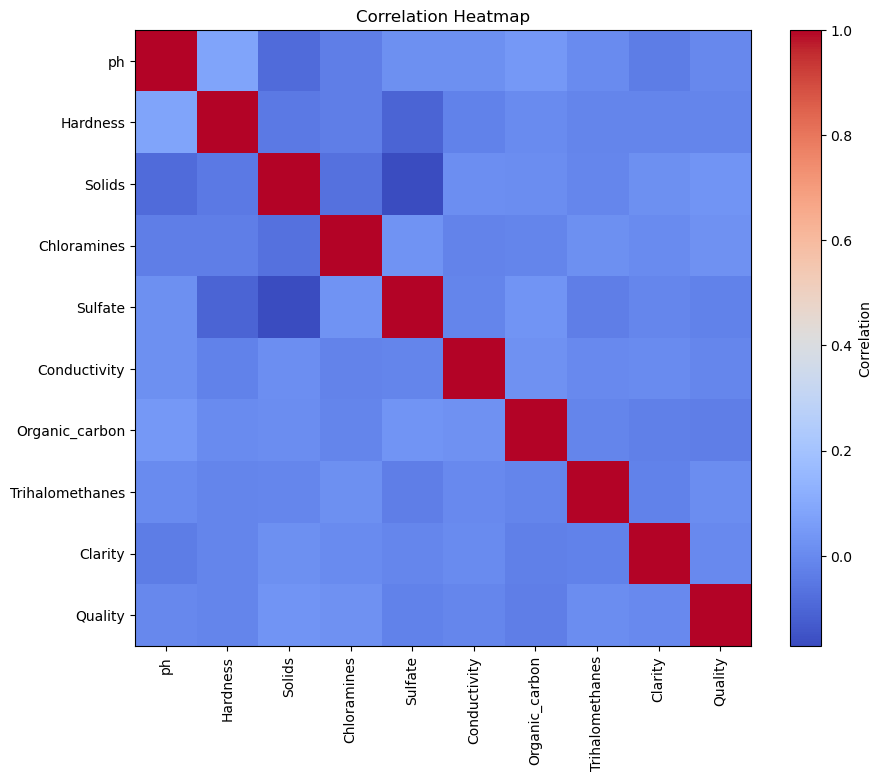

In [4]:
import matplotlib.pyplot as plt

# Creating a HEATMAP to check for the presence of correlation between variables in the datset

# Drop the 'row_number' column
classification_data = classification_data.drop('row_number', axis=1, errors='ignore')

# Calculate the correlation matrix
corr_matrix = classification_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()


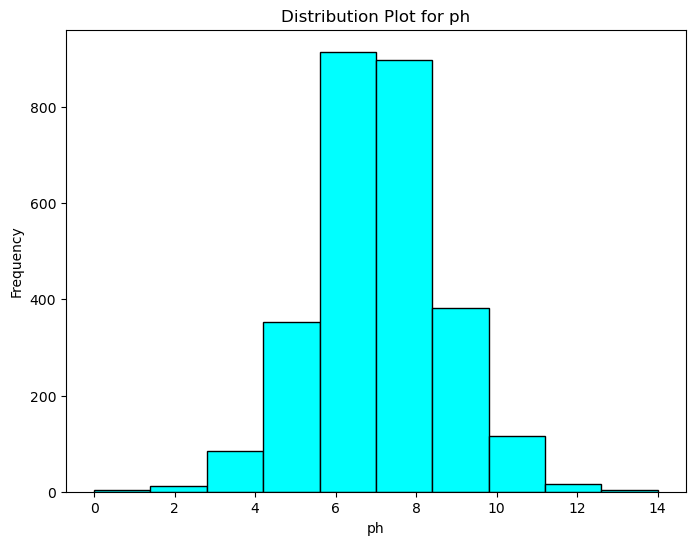

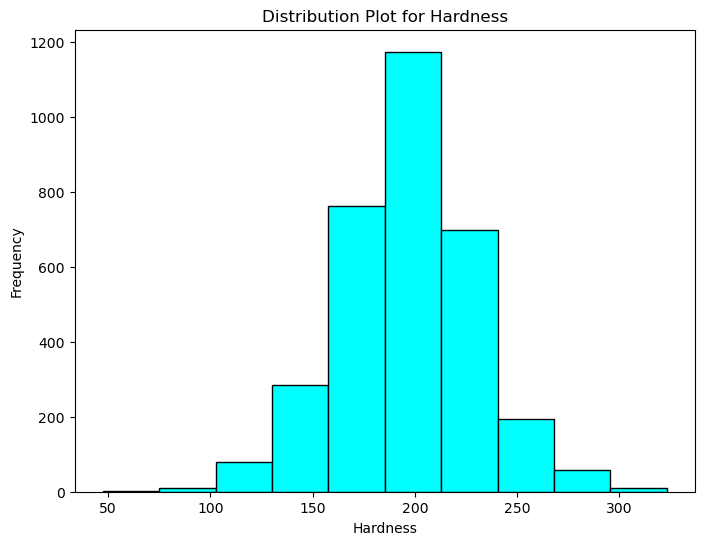

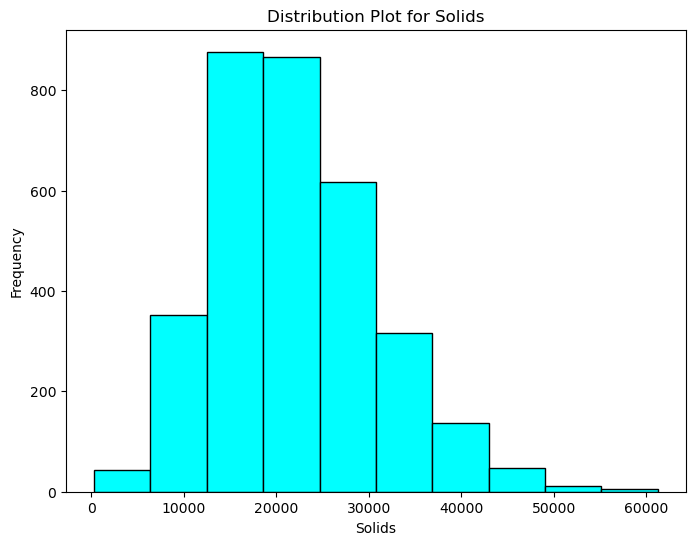

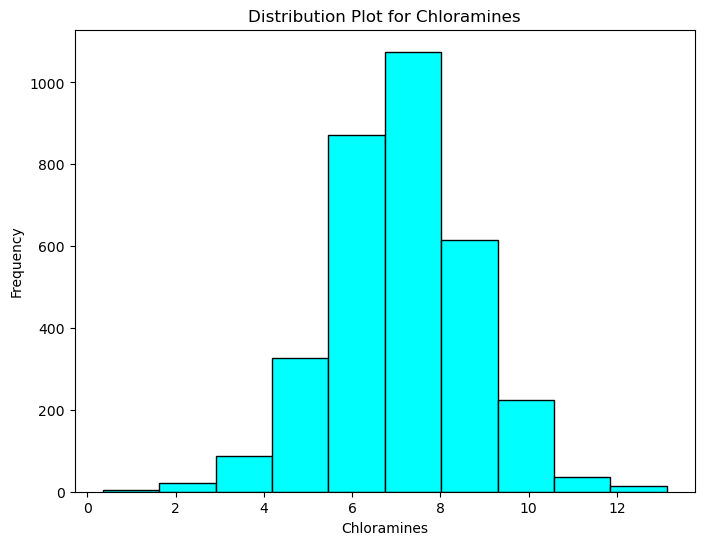

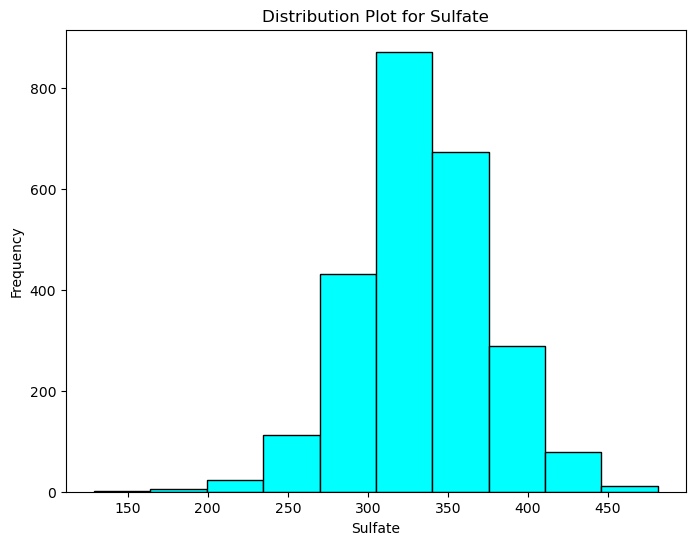

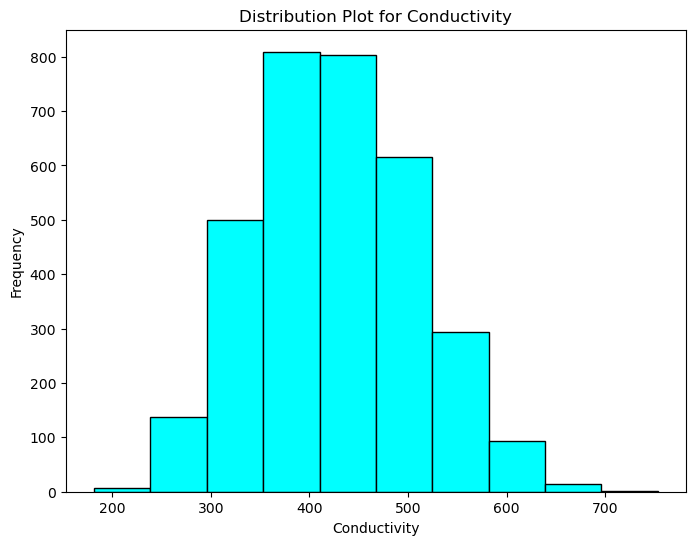

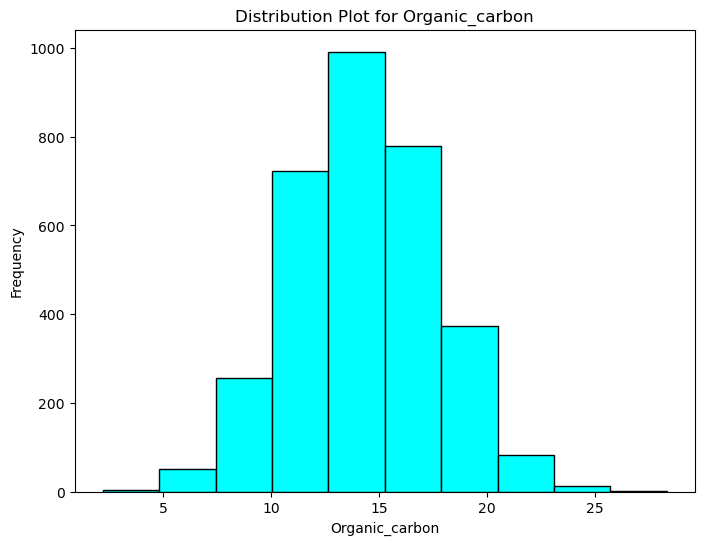

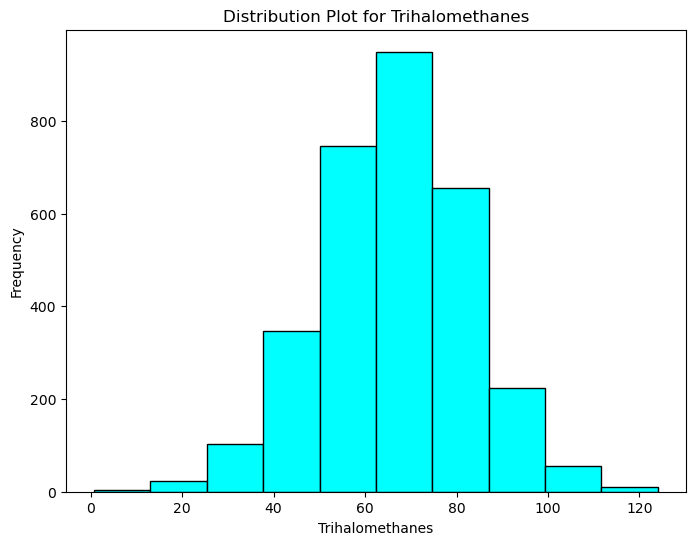

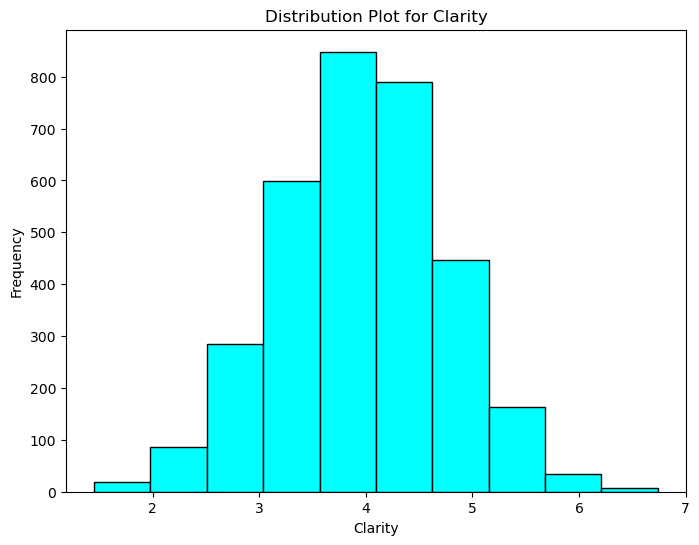

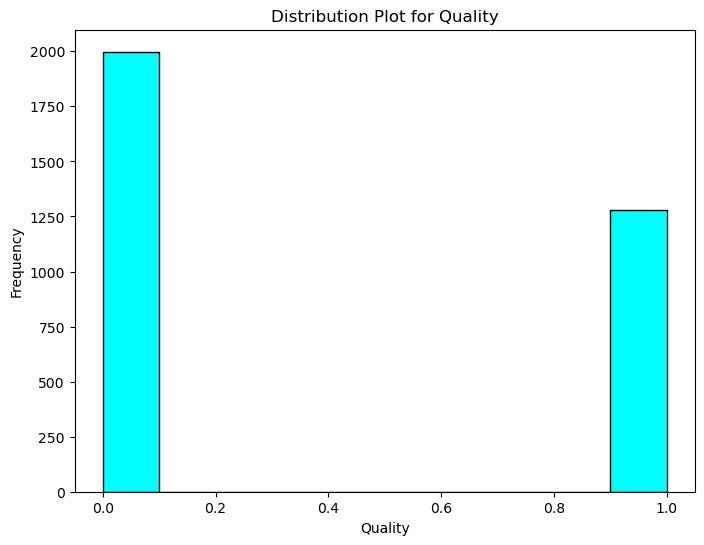

In [5]:
import matplotlib.pyplot as plt

# Creating a DISTRIBUTION BAR CHART to visualise the distribution of the variables in the dataset

# List of variables to plot
variables_to_plot = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                      'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity', 'Quality']

# Plot a distribution plot for each variable
for variable in variables_to_plot:
    plt.figure(figsize=(8, 6))
    classification_data[variable].plot.hist(color='cyan', edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot for {variable}')
    plt.show()


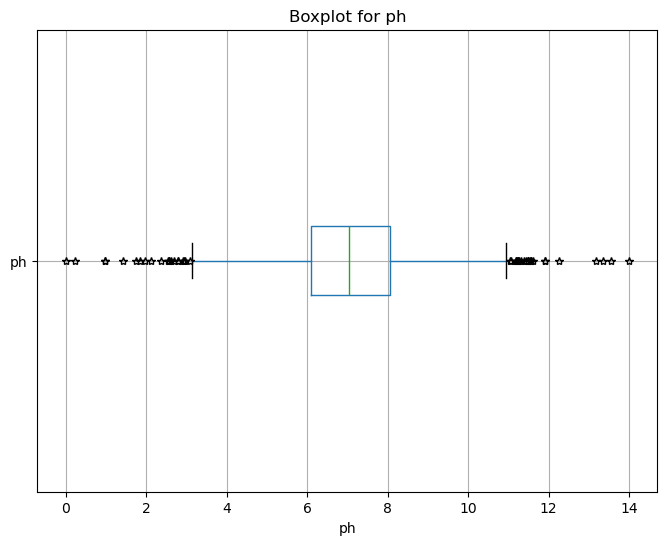

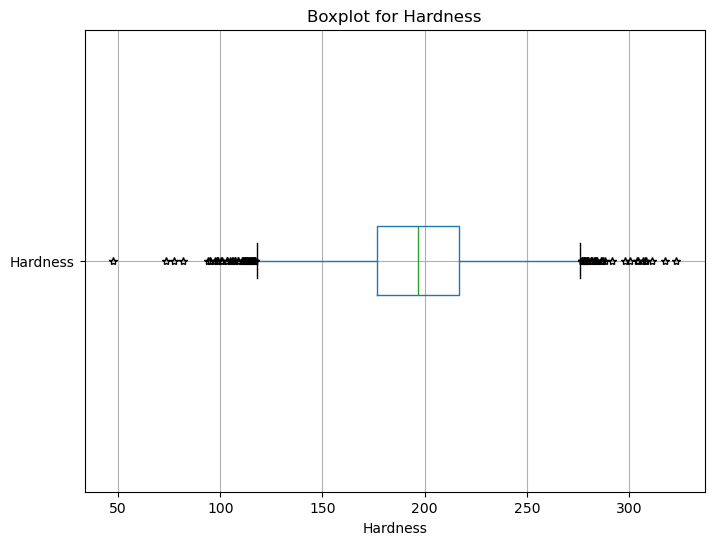

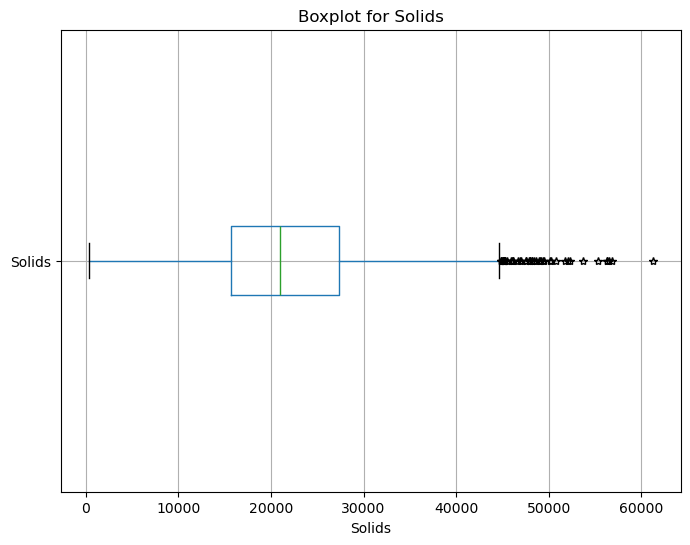

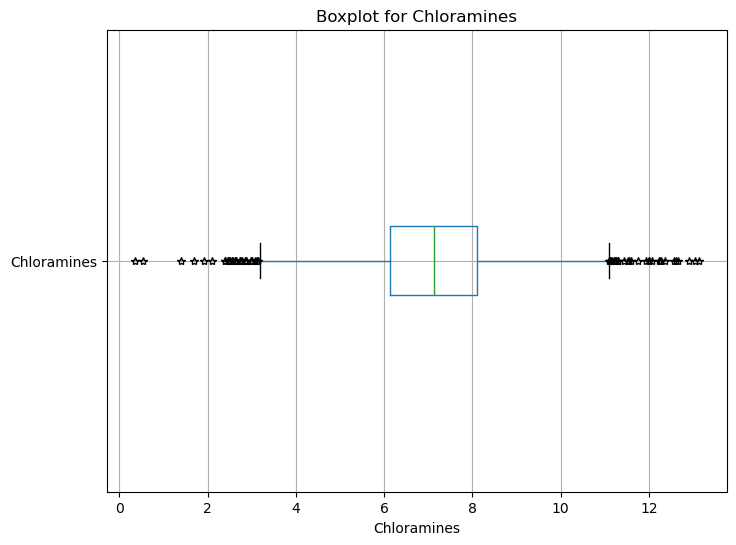

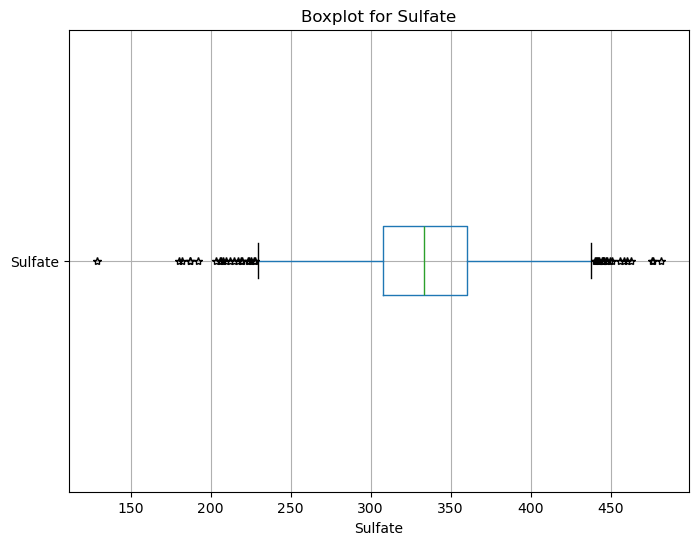

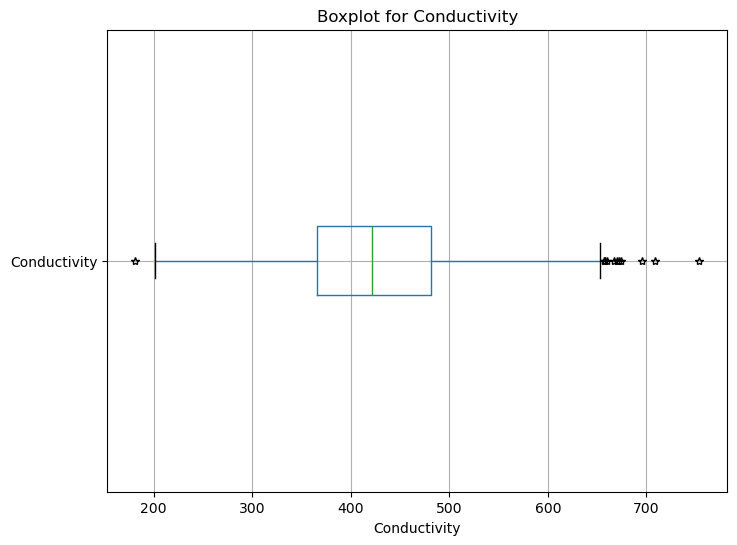

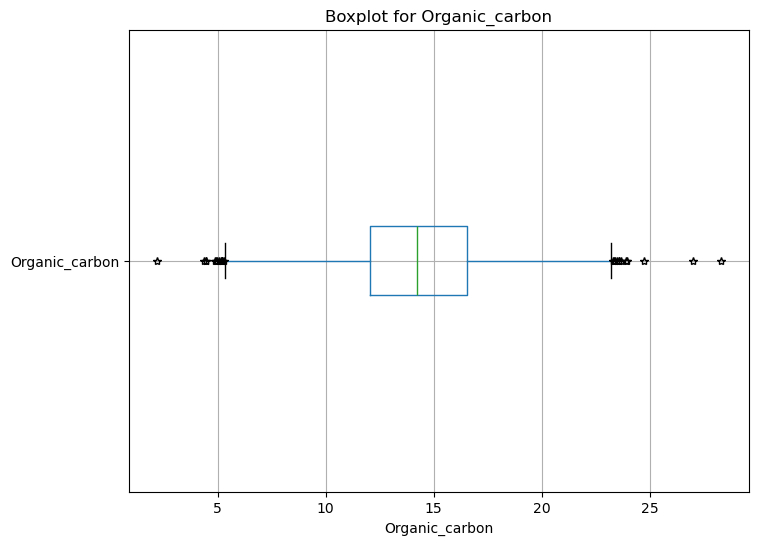

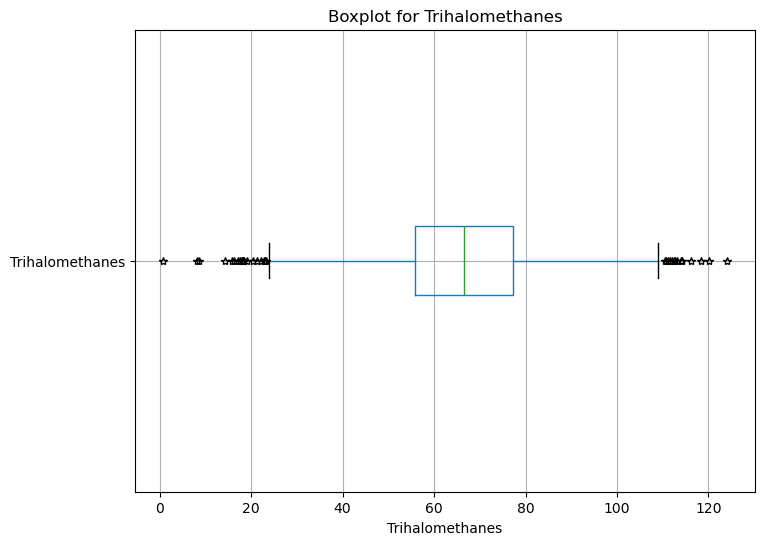

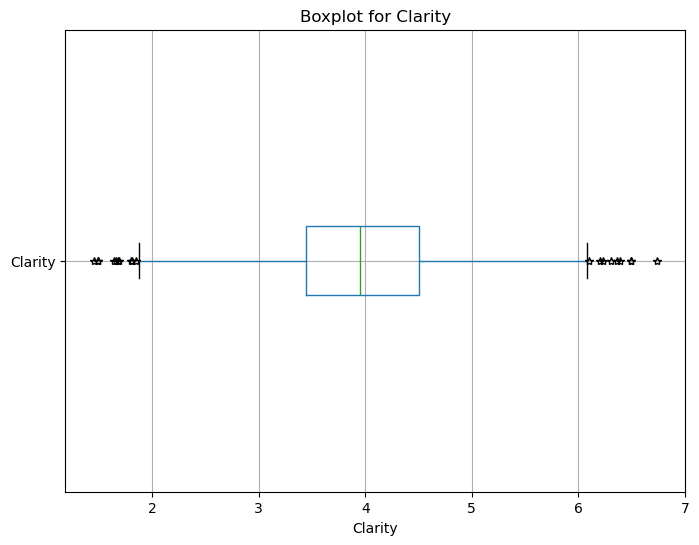

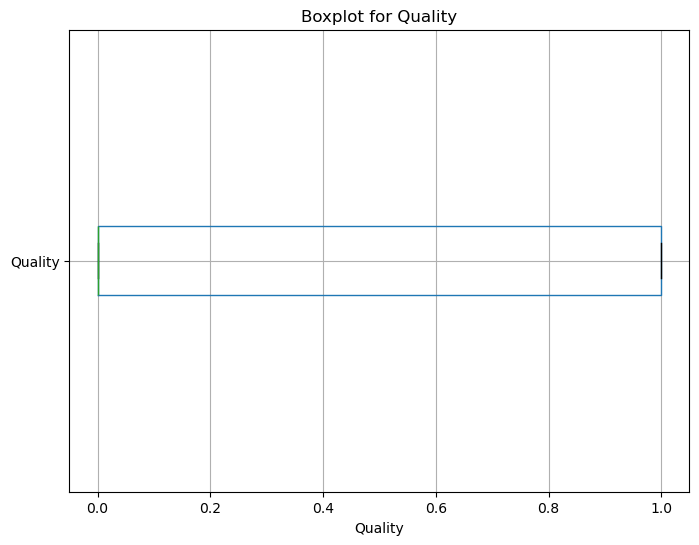

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a BOX-PLOT to see if there is any anormalies in the varirables in the dataset

# List of variables to plot
variables_to_plot = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                      'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity', 'Quality']

# Plot boxplots for each variable
for variable in variables_to_plot:
    plt.figure(figsize=(8, 6))

    classification_data[[variable]].boxplot(sym='*', vert=False)
    
    plt.xlabel(variable)
    plt.title(f'Boxplot for {variable}')
    
    plt.show()


<h4>2  Data Cleaning/ Feature engineering</h4>

2.1 Identifying missing data and anomalies

In [7]:
import pandas as pd
import numpy as np

# Checking row for missing values
print(f"The number of missing value for each column is \n{classification_data.isnull().sum()}")

# Checking for Duplicated values
print(f"\nThe number of rows with duplicated data is {classification_data.duplicated().sum()}")

# Checking for rows with more than one missing value
indices_more_than_one_null = classification_data[classification_data.isnull().sum(axis=1) > 1].index
print(f"\nThe rows with 2 or more data missing are {indices_more_than_one_null.tolist()}")

# Calculate z-scores for numerical features
z_scores = (classification_data - classification_data.mean()) / classification_data.std()

# Set the z-score threshold
z_score_limit = 3

# Find rows with numerical anomalies
indices_numerical_anomalies = z_scores.abs().gt(z_score_limit).any(axis=1)
rows_numerical_anomalies = classification_data.loc[indices_numerical_anomalies].index.tolist()

print(f"\nThe rows with numerical anomalies are:\n{rows_numerical_anomalies}")

# Find common elements
common_elements = set(indices_more_than_one_null).intersection(rows_numerical_anomalies)

# Combine indices that should be dropped
dropped_rows = sorted((set(indices_more_than_one_null) | set(rows_numerical_anomalies)) - common_elements)

print(f"\nThe rows to be dropped are:\n{dropped_rows}")


The number of missing value for each column is 
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64

The number of rows with duplicated data is 0

The rows with 2 or more data missing are [20, 34, 38, 59, 62, 67, 81, 119, 121, 141, 146, 160, 166, 171, 201, 215, 229, 230, 245, 252, 282, 377, 387, 410, 474, 499, 549, 554, 567, 608, 610, 614, 631, 632, 641, 642, 646, 651, 664, 668, 671, 709, 737, 746, 764, 796, 811, 827, 869, 911, 929, 970, 992, 1001, 1009, 1021, 1027, 1116, 1136, 1157, 1169, 1205, 1206, 1212, 1313, 1339, 1398, 1413, 1437, 1446, 1449, 1456, 1476, 1535, 1563, 1567, 1570, 1575, 1585, 1618, 1648, 1666, 1733, 1749, 1760, 1764, 1772, 1792, 1803, 1805, 1838, 1875, 1880, 1908, 1927, 1936, 1957, 1967, 2021, 2034, 2038, 2065, 2093, 2152, 2173, 2193, 2201, 2225, 2238, 2256, 2258, 2288, 2295, 23

2.2 Combining, dropping and imputing data

In [8]:
# Drop rows from classification_data
cd_dropped = classification_data.drop(dropped_rows)

# Display the DataFrame with dropped rows
print(cd_dropped)

from sklearn.impute import SimpleImputer

# SimpleImputer by median
imputer = SimpleImputer(strategy='median')

# Impute missing values using SimpleImputer
cd_imputed = pd.DataFrame(imputer.fit_transform(cd_dropped), columns=cd_dropped.columns)    

# Display the DataFrame with imputed values
print("Here is the dataset after imputation:\n", cd_imputed)


# Save the imputed DataFrame to a new Excel file
cd_imputed.to_excel('CA1-Dataset/CA1-clean_Classification-Dataset.xlsx', engine='openpyxl')


            ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3270  6.069616  186.659040  26138.78019     7.747547  345.700257   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes   Clarity  Quality  
0       564.308654       10.379783        86.990970  2.963135        0  
1       592.885359       15.180013   


<h3>2.3 Data Visualisation After Imputation</h3>


In [9]:
# Checking basic statistics
stats_imputed=cd_imputed.describe()
print(stats_imputed)

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3007.000000  3007.000000   3007.000000  3007.000000  3007.000000   
mean      7.076547   196.359748  21761.661403     7.108921   334.135410   
std       1.418598    31.564468   8407.223197     1.519203    35.350635   
min       2.376768    98.367915    320.942611     2.386653   211.851592   
25%       6.259460   177.188202  15536.290295     6.132339   316.333189   
50%       7.037422   197.102725  20791.318980     7.115715   333.214975   
75%       7.889330   216.264355  27125.629255     8.091696   351.566034   
max      11.621140   287.975540  48204.172190    11.753904   462.474215   

       Conductivity  Organic_carbon  Trihalomethanes      Clarity      Quality  
count   3007.000000     3007.000000      3007.000000  3007.000000  3007.000000  
mean     426.155971       14.309401        66.465800     3.966366     0.385101  
std       80.395156        3.295541        15.663209     0.771775     0.486700  


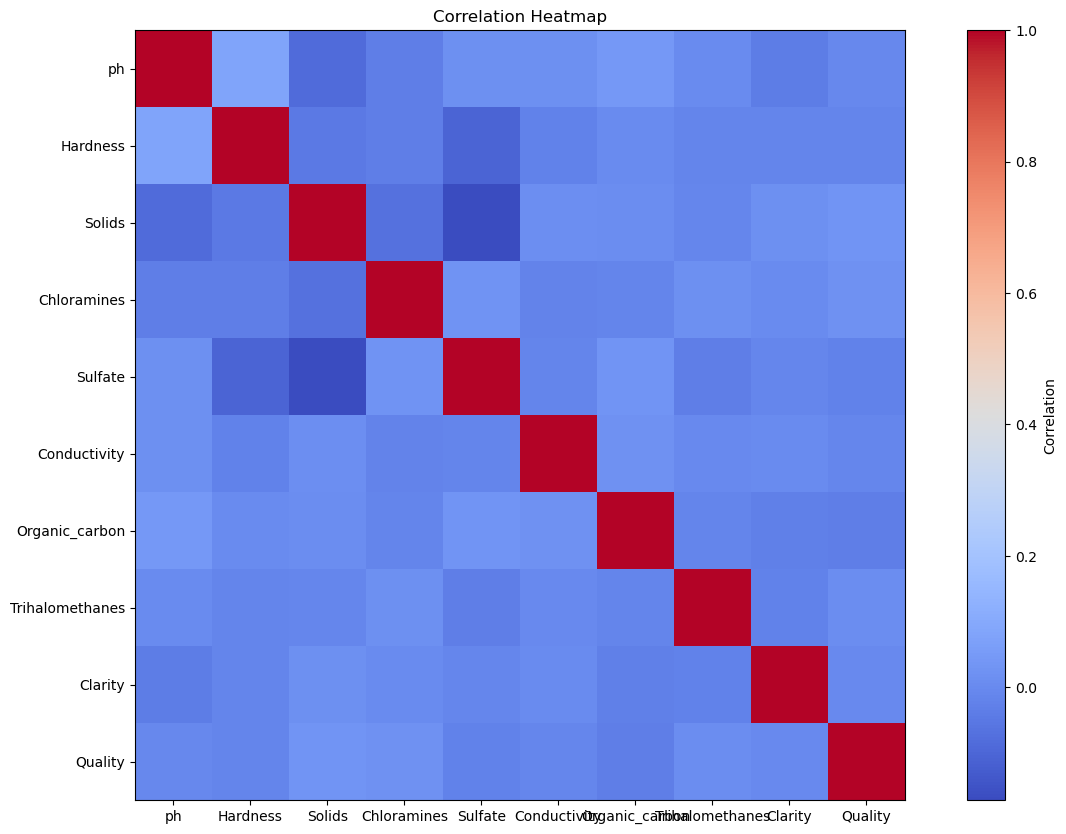

In [10]:
import matplotlib.pyplot as plt

# Creating a HEATMAP to check for the presence of correlation between variables in the datset

# Drop the 'row_number' column
cd_imputed = cd_imputed.drop('row_number', axis=1, errors='ignore')

# Plot the heatmap
plt.figure(figsize=(16, 10))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

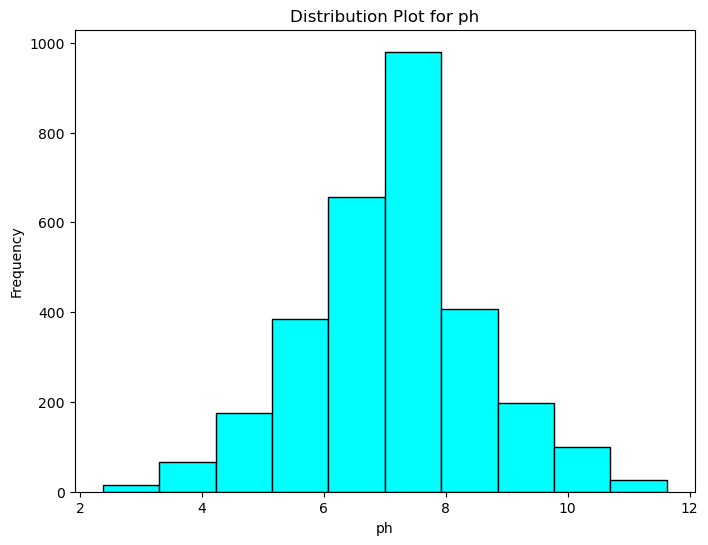

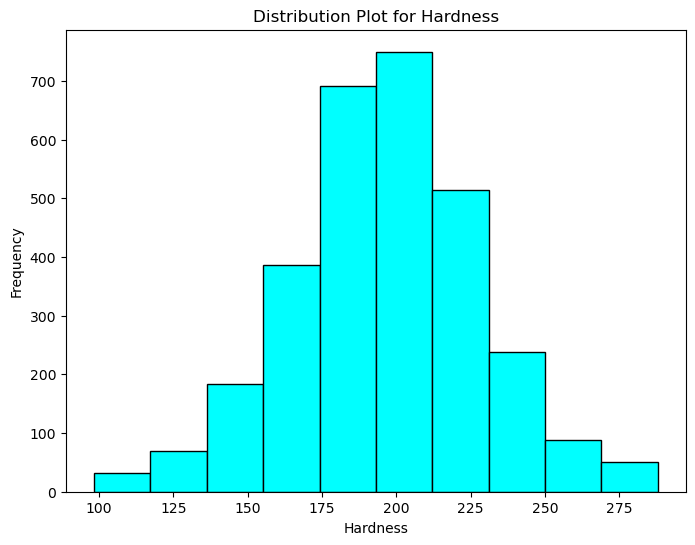

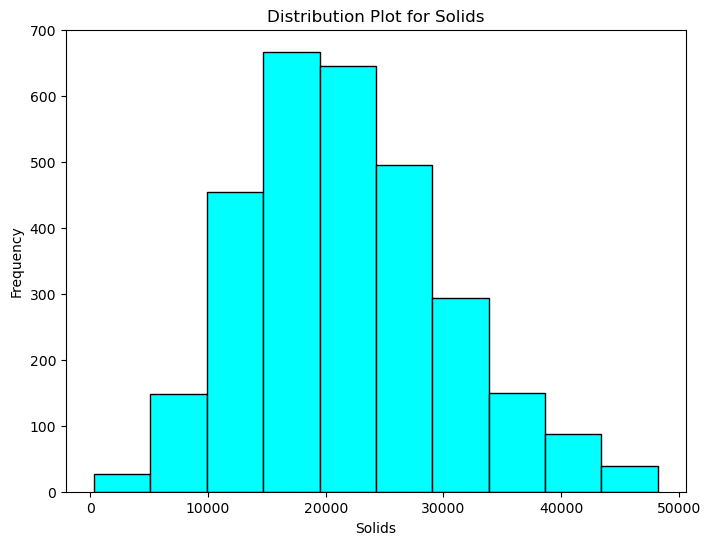

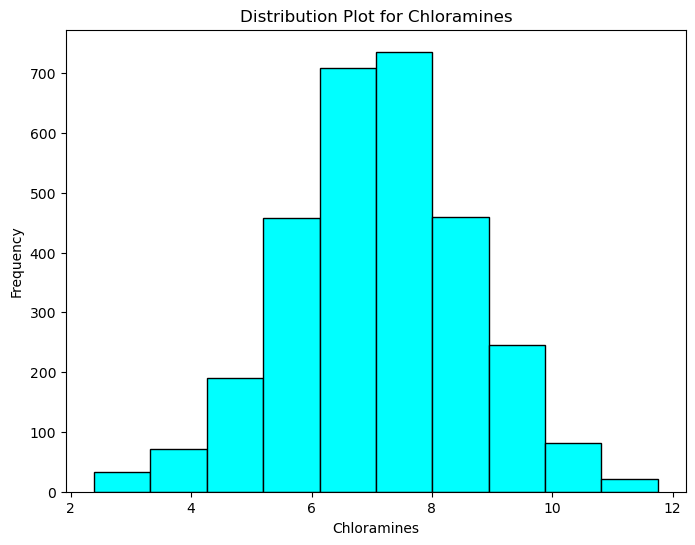

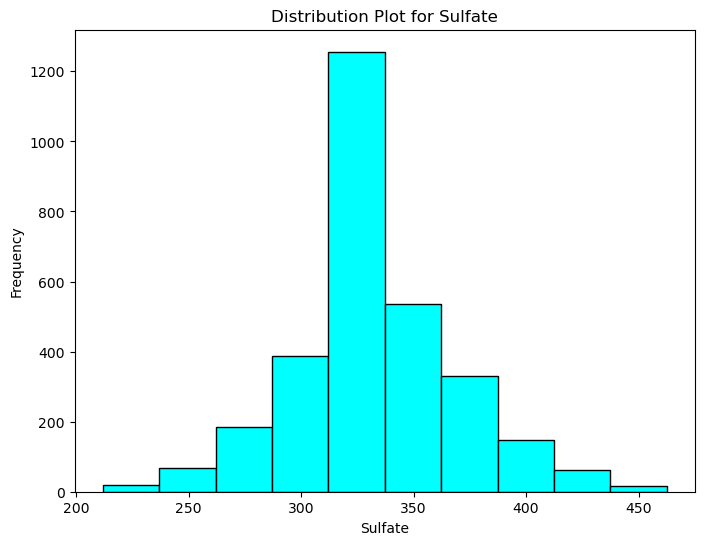

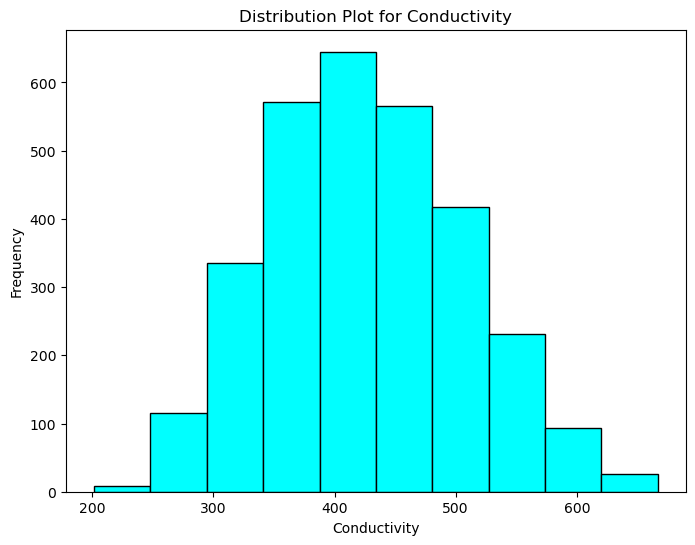

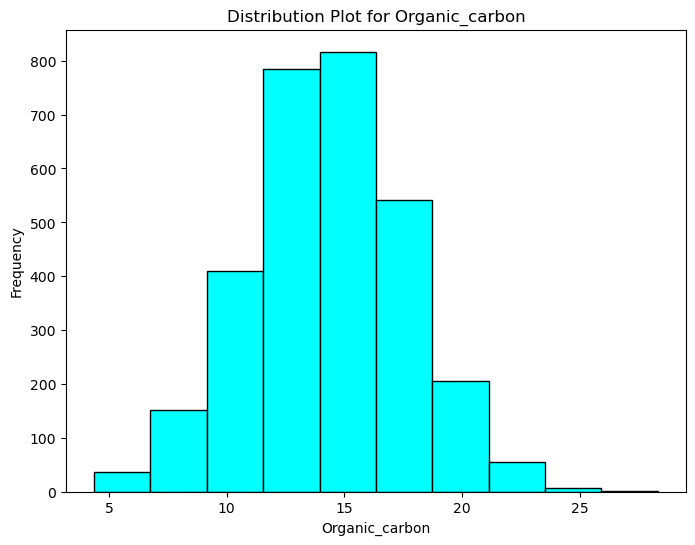

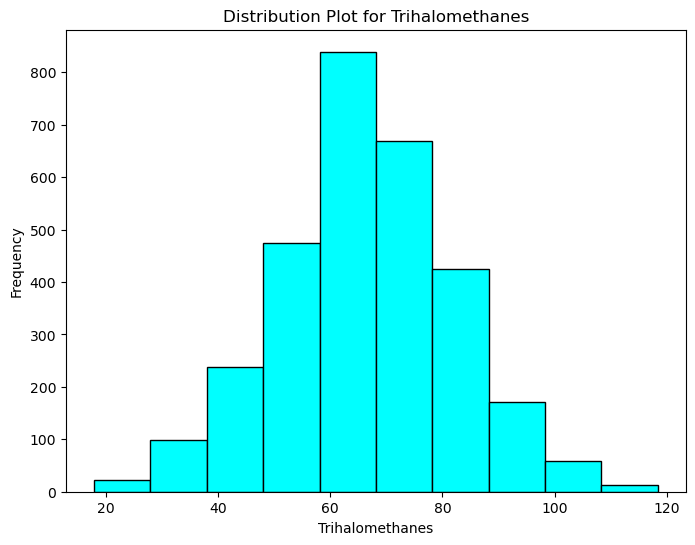

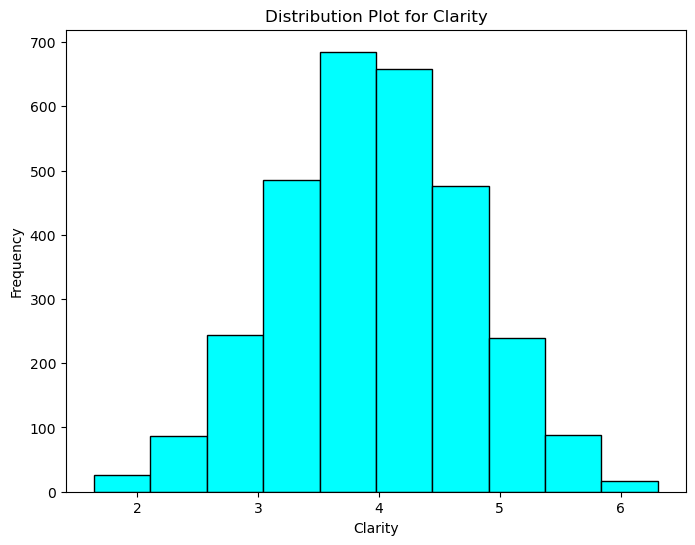

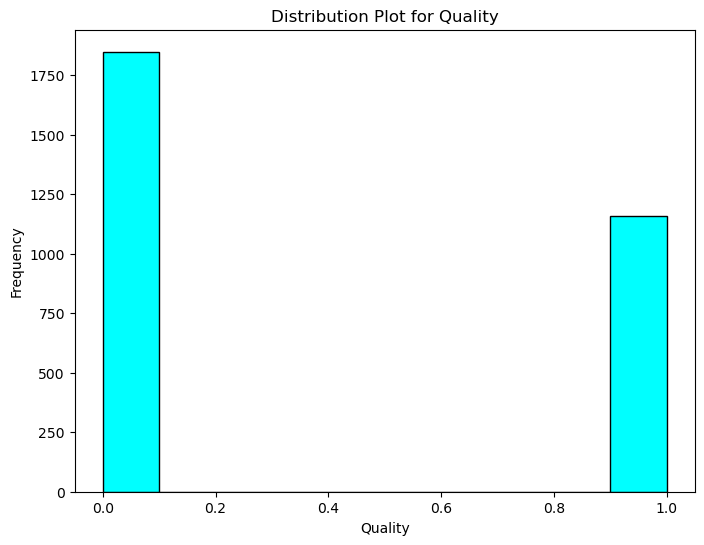

In [11]:
import matplotlib.pyplot as plt

# Creating a DISTRIBUTION BAR CHART to visualise the distribution of the variables in the dataset

# List of variables to plot
variables_to_plot = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                      'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity', 'Quality']

# Plot a distribution plot for each variable
for variable in variables_to_plot:
    plt.figure(figsize=(8, 6))
    cd_imputed[variable].plot.hist(color='cyan', edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution Plot for {variable}')
    plt.show()

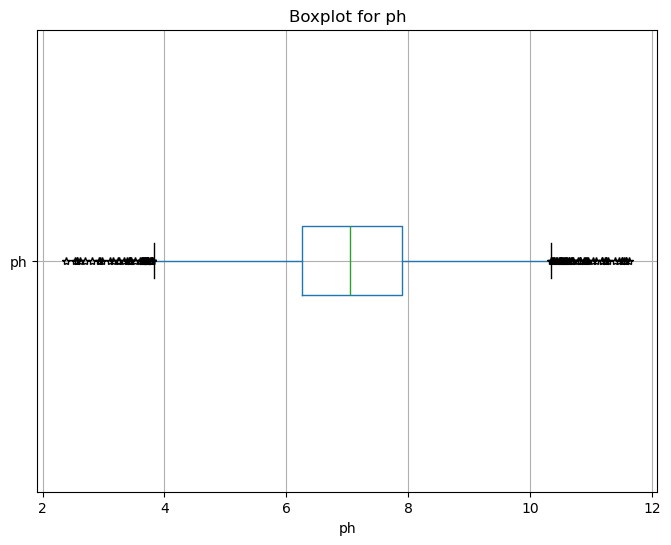

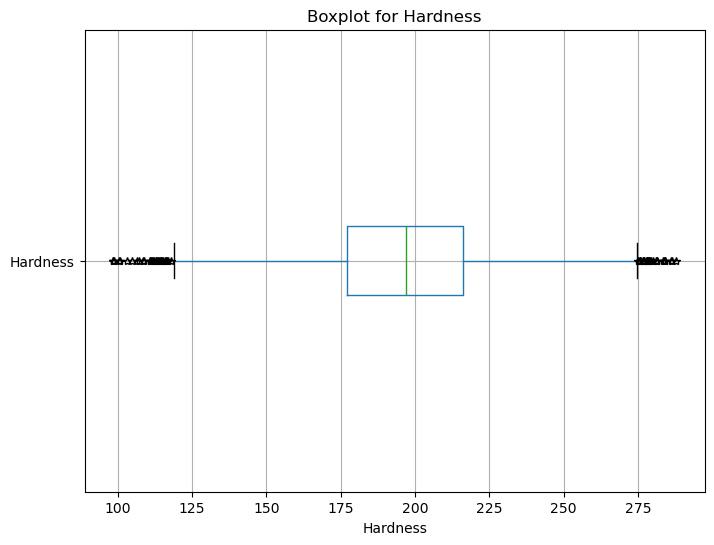

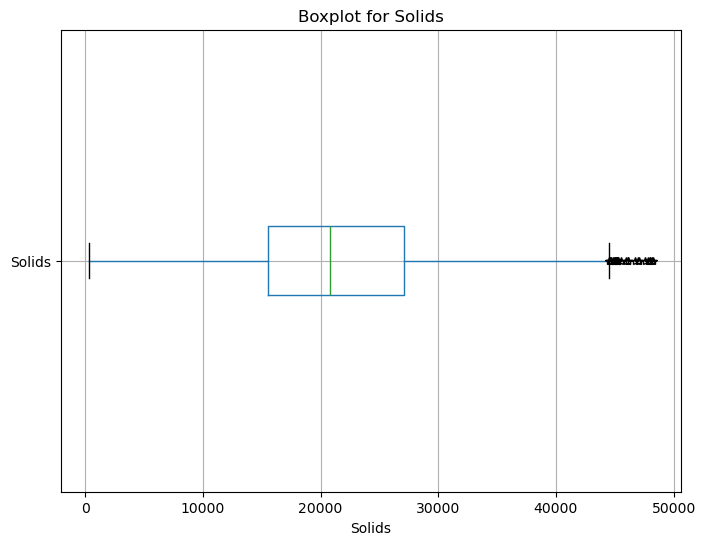

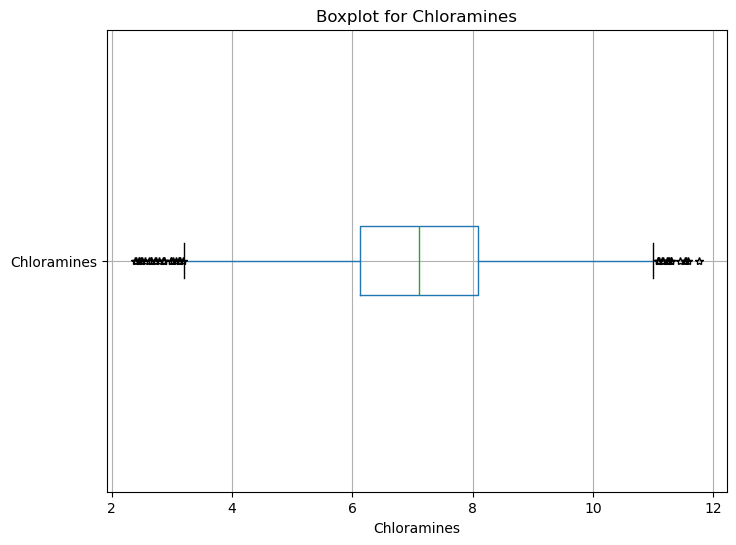

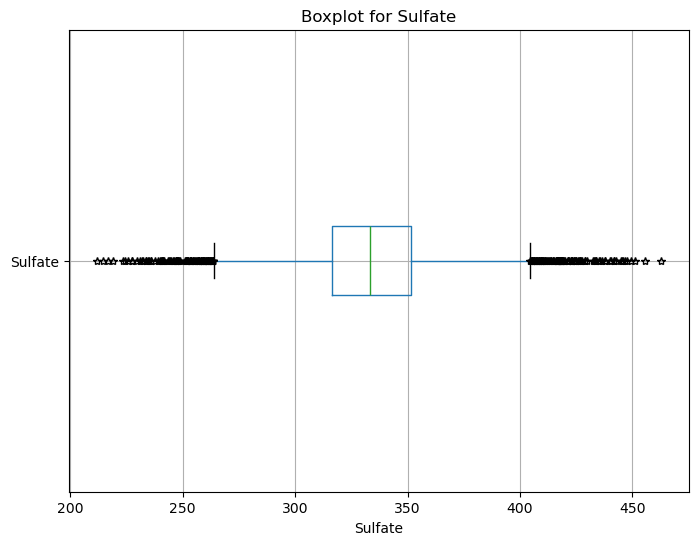

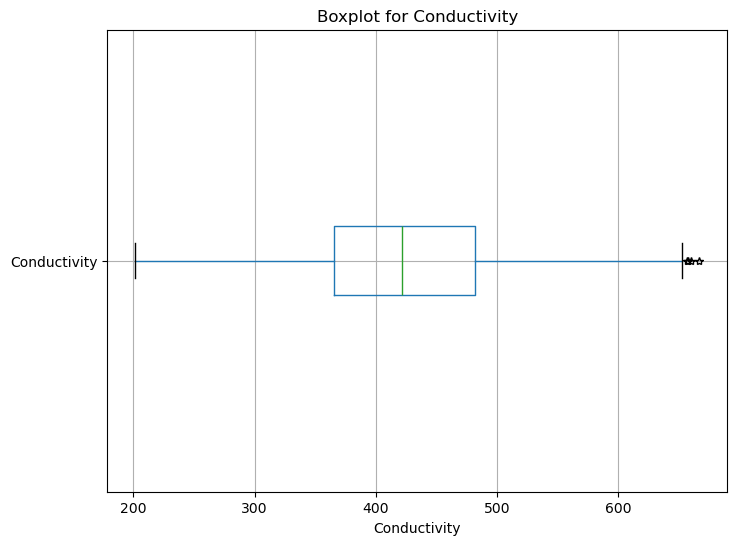

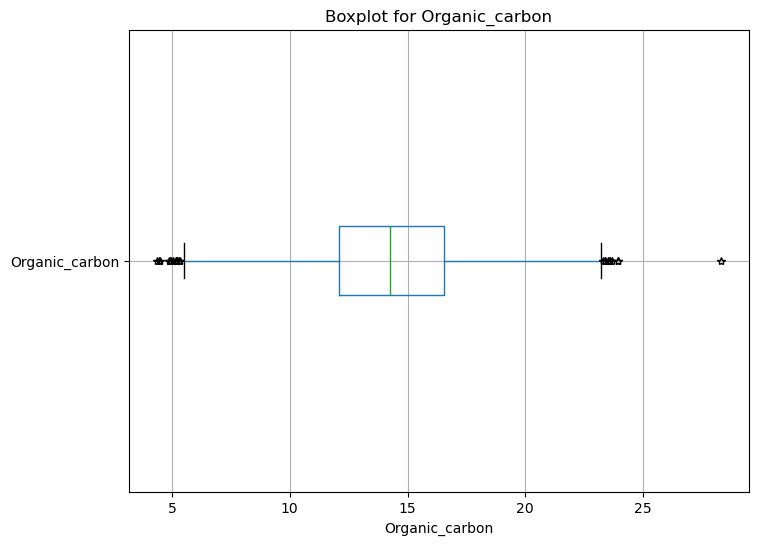

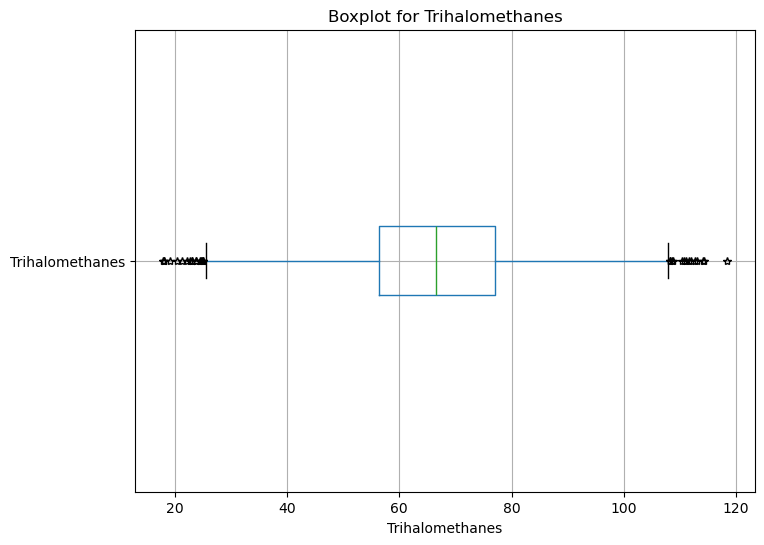

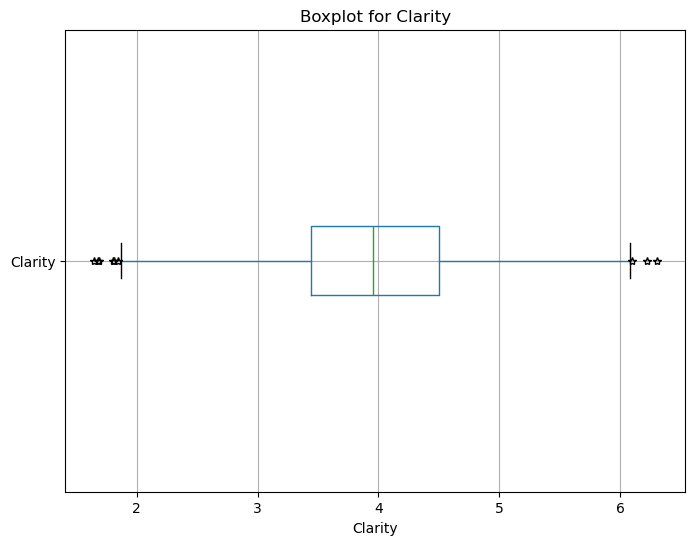

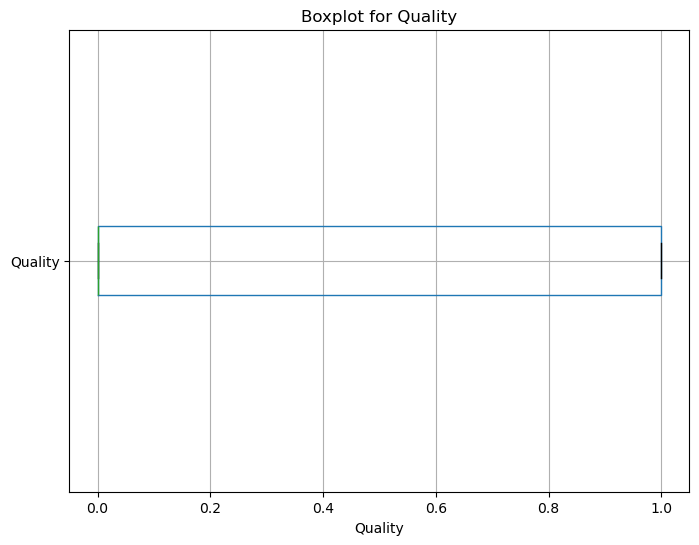

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a BOX-PLOT to see if there is any anormalies in the varirables in the dataset

# List of variables to plot
variables_to_plot = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                      'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity', 'Quality']

# Plot boxplots for each variable
for variable in variables_to_plot:
    plt.figure(figsize=(8, 6))
    
    # Create a boxplot
    cd_imputed[[variable]].boxplot(sym='*', vert=False)
    
    # Add labels and title
    plt.xlabel(variable)
    plt.title(f'Boxplot for {variable}')
    
    plt.show()


<hr></hr>
<h3>Model Selection</h3>
<hr></hr>
<h4>Scoring Metrics</h4>

<dl>
  <dt><b>Accuracy</b></dt>
  <dd>We use accuracy as a scoring metric as we have balanced the data, and we want to look at what is the % of correct predictions.</dd></br>

  <dt><b>F1-Score</b></dt>
  <dd>Harmonic mean of recall and precision, it does not care about how many true negatives are being classified.</dd></br>

  <dt><b>Recall</b></dt>
  <dd>Recall (Sensitivity or True Positive Rate) measures the ability of the model to capture all the relevant cases. It is the ratio of correctly predicted positive observations to the total actual positives.</dd></br>

  <dt><b>Precision</b></dt>
  <dd>Precision (Positive Predictive Value) measures the accuracy of the positive predictions made by the model. It is the ratio of correctly predicted positive observations to the total predicted positives.</dd></br>

  <dt><b>ROC_AUC</b></dt>
  <dd>ROC_AUC, also known as the Area Under the Receiver Operating Characteristic Curve, allows us to range the possibilities for observation (probability) in our classification.</dd></br>
</dl>



3.1 Train-Test-Split and Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Feature and target selection
X = cd_imputed[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                      'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity']]
y = cd_imputed['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


3.2 More feature Engineering (Testing which variables affects the ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate','Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity'] the most when dropped and tested using knn model)

3.2.1 Testing which variables affects the ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate','Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity'] the most when dropped and tested using knn model

In [14]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

feature_to_change = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity']

for feature in feature_to_change:
    features_to_drop = ['Quality', feature]
    X = cd_imputed.drop(features_to_drop, axis=1)
    y = cd_imputed['Quality']

    # Split the data into training and testing sets
    X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model 1: K-Nearest Neighbors
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_scaled, y_train_dropped)
    knn_pred = knn_model.predict(X_test_scaled)

    # Calculate metrics
    accuracy_dropped = accuracy_score(y_test_dropped, knn_pred)*100
    f1_score_dropped = f1_score(y_test_dropped, knn_pred)*100
    roc_auc_dropped = roc_auc_score(y_test_dropped, knn_pred)*100
    recall_dropped = recall_score(y_test_dropped, knn_pred)*100
    precision_dropped = precision_score(y_test_dropped, knn_pred)*100

    # Print the metrics
    print(f'Feature: {feature}')
    print(f'K-Nearest Neighbors \nAccuracy: {accuracy_dropped:.2f}%')
    print(f'F1 Score: {f1_score_dropped:.2f}%')
    print(f'AUC: {roc_auc_dropped:.2f}%')
    print(f'Recall: {recall_dropped:.2f}%')
    print(f'Precision: {precision_dropped:.2f}%')
    print("\n")

Feature: ph
K-Nearest Neighbors 
Accuracy: 54.49%
F1 Score: 31.16%
AUC: 49.02%
Recall: 27.68%
Precision: 35.63%


Feature: Hardness
K-Nearest Neighbors 
Accuracy: 54.49%
F1 Score: 31.16%
AUC: 49.02%
Recall: 27.68%
Precision: 35.63%


Feature: Solids
K-Nearest Neighbors 
Accuracy: 54.49%
F1 Score: 31.16%
AUC: 49.02%
Recall: 27.68%
Precision: 35.63%


Feature: Chloramines
K-Nearest Neighbors 
Accuracy: 54.49%
F1 Score: 31.16%
AUC: 49.02%
Recall: 27.68%
Precision: 35.63%


Feature: Sulfate
K-Nearest Neighbors 
Accuracy: 54.49%
F1 Score: 31.16%
AUC: 49.02%
Recall: 27.68%
Precision: 35.63%


Feature: Conductivity
K-Nearest Neighbors 
Accuracy: 54.49%
F1 Score: 31.16%
AUC: 49.02%
Recall: 27.68%
Precision: 35.63%


Feature: Organic_carbon
K-Nearest Neighbors 
Accuracy: 54.49%
F1 Score: 31.16%
AUC: 49.02%
Recall: 27.68%
Precision: 35.63%


Feature: Trihalomethanes
K-Nearest Neighbors 
Accuracy: 54.49%
F1 Score: 31.16%
AUC: 49.02%
Recall: 27.68%
Precision: 35.63%


Feature: Clarity
K-Nearest Ne

3.2.2 Finding after dropping which feature gives the best acc, auc, f1 score, recall and precision

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score

change_feature = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity']

# Initialize lists to store results for each metric
accuracy_list = []
auc_list = []
f1_list = []
precision_list = []
recall_list = []

# Iterate through each change_feature
for feature in change_feature:
    features_to_drop = ['Quality', feature]
    X = cd_imputed.drop(features_to_drop, axis=1)
    y = cd_imputed['Quality']

    # Split the data into training and testing sets
    X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the KNN model
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_scaled, y_train_dropped)
    knn_pred = knn_model.predict(X_test_scaled)

    # Calculate metrics and append to lists
    accuracy_list.append(accuracy_score(y_test_dropped, knn_pred) * 100)
    auc_list.append(roc_auc_score(y_test_dropped, knn_pred) * 100)
    f1_list.append(f1_score(y_test_dropped, knn_pred) * 100)
    precision_list.append(precision_score(y_test_dropped, knn_pred) * 100)
    recall_list.append(recall_score(y_test_dropped, knn_pred) * 100)

# Find the best model based on each metric
# .index is to find the index of highest value in the list below
best_accuracy = change_feature[accuracy_list.index(max(accuracy_list))]
best_auc = change_feature[auc_list.index(max(auc_list))]
best_f1 = change_feature[f1_list.index(max(f1_list))]
best_precision = change_feature[precision_list.index(max(precision_list))]
best_recall = change_feature[recall_list.index(max(recall_list))]

# Print results with best features
print("\nBest Features to be dropped:")
print(f"Best dropped feature for Accuracy: {best_accuracy} with Accuracy {max(accuracy_list):.2f}%")
print(f"Best dropped feature for AUC: {best_auc} with AUC {max(auc_list):.2f}%")
print(f"Best dropped feature for F1 Score: {best_f1} with F1 Score {max(f1_list):.2f}%")
print(f"Best dropped feature for Precision: {best_precision} with Precision {max(precision_list):.2f}%")
print(f"Best dropped feature for Recall: {best_recall} with Recall {max(recall_list):.2f}%")



Best Features to be dropped:
Best dropped feature for Accuracy: ph with Accuracy 54.49%
Best dropped feature for AUC: ph with AUC 49.02%
Best dropped feature for F1 Score: ph with F1 Score 31.16%
Best dropped feature for Precision: ph with Precision 35.63%
Best dropped feature for Recall: ph with Recall 27.68%


Therfore as when ph is dropped, it gives the best acc, auc, f1 score, recall and precision and has the highest correlation with hardness as compared to other correlations of other variables by looking at the correlation heatmap, ph should be dropped.

3.3 Getting All Possible Classification Models 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ph not selected =ph is dropped
# Feature and target selection
X = cd_imputed[[ 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                      'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity']]
y = cd_imputed['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# K-Nearest Neighbors
# Train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Make the prediction
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
auc_knn = roc_auc_score(y_test, y_pred_knn) * 100
f1_knn = f1_score(y_test, y_pred_knn) * 100
precision_knn = precision_score(y_test, y_pred_knn) * 100
recall_knn = recall_score(y_test, y_pred_knn) * 100

# Print results
print("K-Nearest Neighbors (KNN) Model Results:")
print(f"Accuracy: {accuracy_knn:.2f}%")
print(f"AUC: {auc_knn:.2f}%")
print(f"F1 Score: {f1_knn:.2f}%")
print(f"Precision: {precision_knn:.2f}%")
print(f"Recall: {recall_knn:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Model Results:
Accuracy: 62.79%
AUC: 56.27%
F1 Score: 39.46%
Precision: 45.34%
Recall: 34.93%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.78      0.73       393
         1.0       0.45      0.35      0.39       209

    accuracy                           0.63       602
   macro avg       0.57      0.56      0.56       602
weighted avg       0.61      0.63      0.61       602



In [17]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
auc_svm = roc_auc_score(y_test, y_pred_svm) * 100
f1_svm = f1_score(y_test, y_pred_svm) * 100
precision_svm = precision_score(y_test, y_pred_svm) * 100
recall_svm = recall_score(y_test, y_pred_svm) * 100

# Print results
print("Support Vector Machine (SVM) Model Results:")
print(f"Accuracy: {accuracy_svm:.2f}%")
print(f"AUC: {auc_svm:.2f}%")
print(f"F1 Score: {f1_svm:.2f}%")
print(f"Precision: {precision_svm:.2f}%")
print(f"Recall: {recall_svm:.2f}%")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Model Results:
Accuracy: 67.61%
AUC: 55.59%
F1 Score: 25.86%
Precision: 62.96%
Recall: 16.27%
              precision    recall  f1-score   support

         0.0       0.68      0.95      0.79       393
         1.0       0.63      0.16      0.26       209

    accuracy                           0.68       602
   macro avg       0.66      0.56      0.53       602
weighted avg       0.66      0.68      0.61       602



In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gnb = gnb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb) * 100
auc_gnb = roc_auc_score(y_test, y_pred_gnb) * 100
f1_gnb = f1_score(y_test, y_pred_gnb) * 100
precision_gnb = precision_score(y_test, y_pred_gnb) * 100
recall_gnb = recall_score(y_test, y_pred_gnb) * 100

# Print results
print("Gaussian Naive Bayes (GNB) Model Results:")
print(f"Accuracy: {accuracy_gnb:.2f}%")
print(f"AUC: {auc_gnb:.2f}%")
print(f"F1 Score: {f1_gnb:.2f}%")
print(f"Precision: {precision_gnb:.2f}%")
print(f"Recall: {recall_gnb:.2f}%")
print(classification_report(y_test, y_pred_gnb))


Gaussian Naive Bayes (GNB) Model Results:
Accuracy: 64.45%
AUC: 53.96%
F1 Score: 27.70%
Precision: 47.13%
Recall: 19.62%
              precision    recall  f1-score   support

         0.0       0.67      0.88      0.76       393
         1.0       0.47      0.20      0.28       209

    accuracy                           0.64       602
   macro avg       0.57      0.54      0.52       602
weighted avg       0.60      0.64      0.60       602



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
auc_lr = roc_auc_score(y_test, y_pred_lr) * 100
f1_lr = f1_score(y_test, y_pred_lr) * 100
precision_lr = precision_score(y_test, y_pred_lr) * 100
recall_lr = recall_score(y_test, y_pred_lr) * 100

# Print results
print("Logistic Regression (LR) Model Results:")
print(f"Accuracy: {accuracy_lr:.2f}%")
print(f"AUC: {auc_lr:.2f}%")
# print(f"F1 Score: {f1_lr:.2f}%")
# print(f"Precision: {precision_lr:.2f}%")
# print(f"Recall: {recall_lr:.2f}%")
# print(classification_report(y_test, y_pred_lr))

Logistic Regression (LR) Model Results:
Accuracy: 65.28%
AUC: 50.00%


c:\Users\14cut\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
auc_dt = roc_auc_score(y_test, y_pred_dt) * 100
f1_dt = f1_score(y_test, y_pred_dt) * 100
precision_dt = precision_score(y_test, y_pred_dt) * 100
recall_dt = recall_score(y_test, y_pred_dt) * 100

# Print results
print("Decision Tree (DT) Model Results:")
print(f"Accuracy: {accuracy_dt:.2f}%")
print(f"AUC: {auc_dt:.2f}%")
print(f"F1 Score: {f1_dt:.2f}%")
print(f"Precision: {precision_dt:.2f}%")
print(f"Recall: {recall_dt:.2f}%")
print(classification_report(y_test, y_pred_dt))

Decision Tree (DT) Model Results:
Accuracy: 55.65%
AUC: 53.37%
F1 Score: 41.83%
Precision: 38.40%
Recall: 45.93%
              precision    recall  f1-score   support

         0.0       0.68      0.61      0.64       393
         1.0       0.38      0.46      0.42       209

    accuracy                           0.56       602
   macro avg       0.53      0.53      0.53       602
weighted avg       0.58      0.56      0.56       602



In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb) * 100
auc_gb = roc_auc_score(y_test, y_pred_gb) * 100
f1_gb = f1_score(y_test, y_pred_gb) * 100
precision_gb = precision_score(y_test, y_pred_gb) * 100
recall_gb = recall_score(y_test, y_pred_gb) * 100

# Print results
print("Gradient Boosting (GB) Model Results:")
print(f"Accuracy: {accuracy_gb:.2f}%")
print(f"AUC: {auc_gb:.2f}%")
print(f"F1 Score: {f1_gb:.2f}%")
print(f"Precision: {precision_gb:.2f}%")
print(f"Recall: {recall_gb:.2f}%")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting (GB) Model Results:
Accuracy: 64.95%
AUC: 53.67%
F1 Score: 24.91%
Precision: 48.61%
Recall: 16.75%
              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77       393
         1.0       0.49      0.17      0.25       209

    accuracy                           0.65       602
   macro avg       0.58      0.54      0.51       602
weighted avg       0.61      0.65      0.59       602



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train, X_test, y_train, y_test defined

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
auc_rf = roc_auc_score(y_test, y_pred_rf) * 100
f1_rf = f1_score(y_test, y_pred_rf) * 100
precision_rf = precision_score(y_test, y_pred_rf) * 100
recall_rf = recall_score(y_test, y_pred_rf) * 100

# Print results
print("Random Forest (RF) Model Results:")
print(f"Accuracy: {accuracy_rf:.2f}%")
print(f"AUC: {auc_rf:.2f}%")
print(f"F1 Score: {f1_rf:.2f}%")
print(f"Precision: {precision_rf:.2f}%")
print(f"Recall: {recall_rf:.2f}%")
print(classification_report(y_test, y_pred_rf))


Random Forest (RF) Model Results:
Accuracy: 65.28%
AUC: 56.83%
F1 Score: 36.86%
Precision: 50.00%
Recall: 29.19%
              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76       393
         1.0       0.50      0.29      0.37       209

    accuracy                           0.65       602
   macro avg       0.60      0.57      0.56       602
weighted avg       0.63      0.65      0.62       602



3.4 Finding which Models should I improve further by Hyperparameter Tuning

In [23]:

# Create lists for each metric
accuracy = [accuracy_knn, accuracy_svm, accuracy_gnb, accuracy_lr, accuracy_dt, accuracy_gb, accuracy_rf]
auc = [auc_knn, auc_svm, auc_gnb, auc_lr, auc_dt, auc_gb, auc_rf]
f1_score = [f1_knn, f1_svm, f1_gnb, f1_lr, f1_dt, f1_gb, f1_rf]
precision = [precision_knn, precision_svm, precision_gnb, precision_lr, precision_dt, precision_gb, precision_rf]
recall = [recall_knn, recall_svm, recall_gnb, recall_lr, recall_dt, recall_gb, recall_rf]

# Assuming you have a list of model names in the same order as your models
model_names = ['KNearest Neighbors(KNN)', 'Support Vector Machine (SVM)', 'Gaussian Naive Bayes (GNB)', 'Logistic Regression (LR)', 'Decision tree (DT)', 'Gradient Boosting (GB)', 'Random Forest (RF)']

# Create a dictionary to store the results
results_dict = {
    'Accuracy': accuracy,
    'AUC': auc,
    'F1 Score': f1_score,
    'Precision': precision,
    'Recall': recall
}

# Find the best model based on each metric
best_accuracy_model_index = accuracy.index(max(accuracy))
best_auc_model_index = auc.index(max(auc))
best_f1_model_index = f1_score.index(max(f1_score))
best_precision_model_index = precision.index(max(precision))
best_recall_model_index = recall.index(max(recall))

# Print results with model names
print("\nBest Models:")
print(f"Best Accuracy Model: {model_names[best_accuracy_model_index]} with Accuracy {max(accuracy):.2f}")
print(f"Best AUC Model: {model_names[best_auc_model_index]} with AUC {max(auc):.2f}")
print(f"Best F1 Score Model: {model_names[best_f1_model_index]} with F1 Score {max(f1_score):.2f}")
print(f"Best Precision Model: {model_names[best_precision_model_index]} with Precision {max(precision):.2f}")
print(f"Best Recall Model: {model_names[best_recall_model_index]} with Recall {max(recall):.2f}")




Best Models:
Best Accuracy Model: Support Vector Machine (SVM) with Accuracy 67.61
Best AUC Model: Random Forest (RF) with AUC 56.83
Best F1 Score Model: Decision tree (DT) with F1 Score 41.83
Best Precision Model: Support Vector Machine (SVM) with Precision 62.96
Best Recall Model: Decision tree (DT) with Recall 45.93


Since 'Decision tree (DT)', 'Gradient Boosting (GB)', 'Random Forest (RF)','Support Vector Machine(SVM)' performed the best out of all of the Models, therfore I would be hyperparmeter tuning these 4 models for the best results

<hr></hr>
<h4>4 Hyperparameter tuning</h4>
<hr></hr>

In [24]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Feature and target selection
X = cd_imputed[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                      'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity']]
y = cd_imputed['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# 1. Decision Tree Classifier Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5)
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Train the model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(
    max_depth=best_params_dt['max_depth'],
    min_samples_split=best_params_dt['min_samples_split'],
    min_samples_leaf=best_params_dt['min_samples_leaf']
)
best_dt_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_dt = best_dt_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
auc_dt = roc_auc_score(y_test, y_pred_dt) * 100
f1_dt = f1_score(y_test, y_pred_dt) * 100
precision_dt = precision_score(y_test, y_pred_dt) * 100
recall_dt = recall_score(y_test, y_pred_dt) * 100

print("Best Decision Tree Model:")
print(f"Best Hyperparameters: {best_params_dt}")
print(f"Accuracy: {accuracy_dt:.2f}%")
print(f"AUC: {auc_dt:.2f}%")
print(f"F1 Score: {f1_dt:.2f}%")
print(f"Precision: {precision_dt:.2f}%")
print(f"Recall: {recall_dt:.2f}%")





# 2. Gradient Boosting Classifier Hyperparameter Tuning
param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

gb_model = GradientBoostingClassifier()
random_search_gb = RandomizedSearchCV(gb_model, param_dist_gb, n_iter=10, cv=5)
random_search_gb.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_gb = random_search_gb.best_params_

# Train the model with the best hyperparameters
best_gb_model = GradientBoostingClassifier(
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    max_depth=best_params_gb['max_depth'],
    min_samples_split=best_params_gb['min_samples_split'],
    min_samples_leaf=best_params_gb['min_samples_leaf'],
    subsample=best_params_gb['subsample']
)
best_gb_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_gb = best_gb_model.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb) * 100
auc_gb = roc_auc_score(y_test, y_pred_gb) * 100
f1_gb = f1_score(y_test, y_pred_gb) * 100
precision_gb = precision_score(y_test, y_pred_gb) * 100
recall_gb = recall_score(y_test, y_pred_gb) * 100

print("\nBest Gradient Boosting Model:")
print(f"Best Hyperparameters: {best_params_gb}")
print(f"Accuracy: {accuracy_gb:.2f}%")
print(f"AUC: {auc_gb:.2f}%")
print(f"F1 Score: {f1_gb:.2f}%")
print(f"Precision: {precision_gb:.2f}%")
print(f"Recall: {recall_gb:.2f}%")





# 3. Random Forest Classifier Hyperparameter Tuning
param_dist_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier()
random_search_rf = RandomizedSearchCV(rf_model, param_dist_rf, n_iter=10, cv=5)
random_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    bootstrap=best_params_rf['bootstrap']
)
best_rf_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_rf = best_rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
auc_rf = roc_auc_score(y_test, y_pred_rf) * 100
f1_rf = f1_score(y_test, y_pred_rf) * 100
precision_rf = precision_score(y_test, y_pred_rf) * 100
recall_rf = recall_score(y_test, y_pred_rf) * 100

print("\nBest Random Forest Model:")
print(f"Best Hyperparameters: {best_params_rf}")
print(f"Accuracy: {accuracy_rf:.2f}%")
print(f"AUC: {auc_rf:.2f}%")
print(f"F1 Score: {f1_rf:.2f}%")
print(f"Precision: {precision_rf:.2f}%")
print(f"Recall: {recall_rf:.2f}%")





# 4. Support Vector Machine (SVM) Classifier Hyperparameter Tuning
# SVM Classifier Hyperparameter Tuning
param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4, 5]
}

# Instantiate SVM model
svm_model = SVC()
random_search_svm = RandomizedSearchCV(svm_model, param_dist_svm, n_iter=10, cv=5)
random_search_svm.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_svm = random_search_svm.best_params_

# Train the model with the best hyperparameters
best_svm_model = SVC(
    C=best_params_svm['C'],
    kernel=best_params_svm['kernel'],
    gamma=best_params_svm['gamma'],
    degree=best_params_svm['degree']
)
best_svm_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_svm = best_svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
auc_svm = roc_auc_score(y_test, y_pred_svm) * 100
f1_svm = f1_score(y_test, y_pred_svm) * 100
precision_svm = precision_score(y_test, y_pred_svm) * 100
recall_svm = recall_score(y_test, y_pred_svm) * 100

print("\nBest SVM Model:")
print(f"Best Hyperparameters: {best_params_svm}")
print(f"Accuracy: {accuracy_svm:.2f}%")
print(f"AUC: {auc_svm:.2f}%")
print(f"F1 Score: {f1_svm:.2f}%")
print(f"Precision: {precision_svm:.2f}%")
print(f"Recall: {recall_svm:.2f}%")


Best Decision Tree Model:
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 61.96%
AUC: 53.94%
F1 Score: 22.37%
Precision: 61.11%
Recall: 13.69%

Best Gradient Boosting Model:
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 62.79%
AUC: 55.39%
F1 Score: 28.21%
Precision: 61.97%
Recall: 18.26%

Best Random Forest Model:
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 15, 'bootstrap': True}
Accuracy: 67.61%
AUC: 61.27%
F1 Score: 42.14%
Precision: 73.96%
Recall: 29.46%

Best SVM Model:
Best Hyperparameters: {'kernel': 'poly', 'gamma': 0.1, 'degree': 4, 'C': 10}
Accuracy: 64.12%
AUC: 59.26%
F1 Score: 43.75%
Precision: 58.74%
Recall: 34.85%


Finding which is the best model

In [25]:
# Create lists for each metric
accuracy = [accuracy_dt, accuracy_gb, accuracy_rf, accuracy_svm]
auc = [auc_dt, auc_gb, auc_rf, auc_svm]
f1_score = [f1_dt, f1_gb, f1_rf, f1_svm]
precision = [precision_dt, precision_gb, precision_rf, precision_svm]
recall = [recall_dt, recall_gb, recall_rf, recall_svm]

# Assuming you have a list of model names in the same order as your models
model_names = ['Decision Tree(DT)', 'Gradient Boosting(GB)', 'Random Forest(RF)', 'Support Vector Machine (SVM)']

results_dict = {
    'Accuracy': accuracy,
    'AUC': auc,
    'F1 Score': f1_score,
    'Precision': precision,
    'Recall': recall
}

# Find the best model based on each metric
best_accuracy_model_index = accuracy.index(max(accuracy))
best_auc_model_index = auc.index(max(auc))
best_f1_model_index = f1_score.index(max(f1_score))
best_precision_model_index = precision.index(max(precision))
best_recall_model_index = recall.index(max(recall))

# Print results with model names
print("\nBest Models:")
print(f"Best Accuracy Model: {model_names[best_accuracy_model_index]} with Accuracy {max(accuracy):.2f}%")
print(f"Best AUC Model: {model_names[best_auc_model_index]} with AUC {max(auc):.2f}%")
print(f"Best F1 Score Model: {model_names[best_f1_model_index]} with F1 Score {max(f1_score):.2f}%")
print(f"Best Precision Model: {model_names[best_precision_model_index]} with Precision {max(precision):.2f}%")
print(f"Best Recall Model: {model_names[best_recall_model_index]} with Recall {max(recall):.2f}%")


Best Models:
Best Accuracy Model: Random Forest(RF) with Accuracy 67.61%
Best AUC Model: Random Forest(RF) with AUC 61.27%
Best F1 Score Model: Support Vector Machine (SVM) with F1 Score 43.75%
Best Precision Model: Random Forest(RF) with Precision 73.96%
Best Recall Model: Support Vector Machine (SVM) with Recall 34.85%


Best Models:
Best Accuracy Model: Support Vector Machine (SVM) with Accuracy 70.10%
Best AUC Model: Support Vector Machine (SVM) with AUC 63.27%
Best F1 Score Model: Support Vector Machine (SW) with F1 Score 46.11%
Best Precision Model: Support Vector Machine (SVH) with Precision 76.24%
Best Recall Model: Support Vector Machine (SVM) with Recall 33.05%

<hr></hr>
<h3>5 Dummy Baseline and Model Interpretability</h3>
<hr></hr>

5.1 Dummy Baseline

In [29]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Loading dataset
classification_data = pd.read_csv("CA1-Dataset\CA1-Classification-Dataset.csv")

# Feature and target selection
X = classification_data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                          'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Clarity']]
y = classification_data['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a dummy classifier
dummy_model = DummyClassifier(strategy='most_frequent')

# Train the dummy model (no need to scale features for a dummy model)
dummy_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dummy = dummy_model.predict(X_test)

# Evaluate the dummy model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy) * 100
auc_dummy = roc_auc_score(y_test, y_pred_dummy) * 100   
f1_dummy = f1_score(y_test, y_pred_dummy, zero_division=1) * 100  # Set zero_division to 1
precision_dummy = precision_score(y_test, y_pred_dummy, zero_division=1)  # Set zero_division to 1
recall_dummy = recall_score(y_test, y_pred_dummy, zero_division=1) * 100  # Set zero_division to 1

print("Dummy Model:")
print(f"Accuracy: {accuracy_dummy:.2f}%")
print(f"AUC: {auc_dummy:.2f}%")
print(f"F1 Score: {f1_dummy:.2f}%")
print(f"Precision: {precision_dummy:.2f}%")
print(f"Recall: {recall_dummy:.2f}%")


Dummy Model:
Accuracy: 60.67%
AUC: 50.00%
F1 Score: 0.00%
Precision: 1.00%
Recall: 0.00%


<hr></hr>
<h3>Feature Importance</h3>
<hr></hr>

Feature importance is a way to find out which features are more important for the model. It can be used to find out which features are more important for the model to make predictions. For our model, we will try to visualise the feature importance.

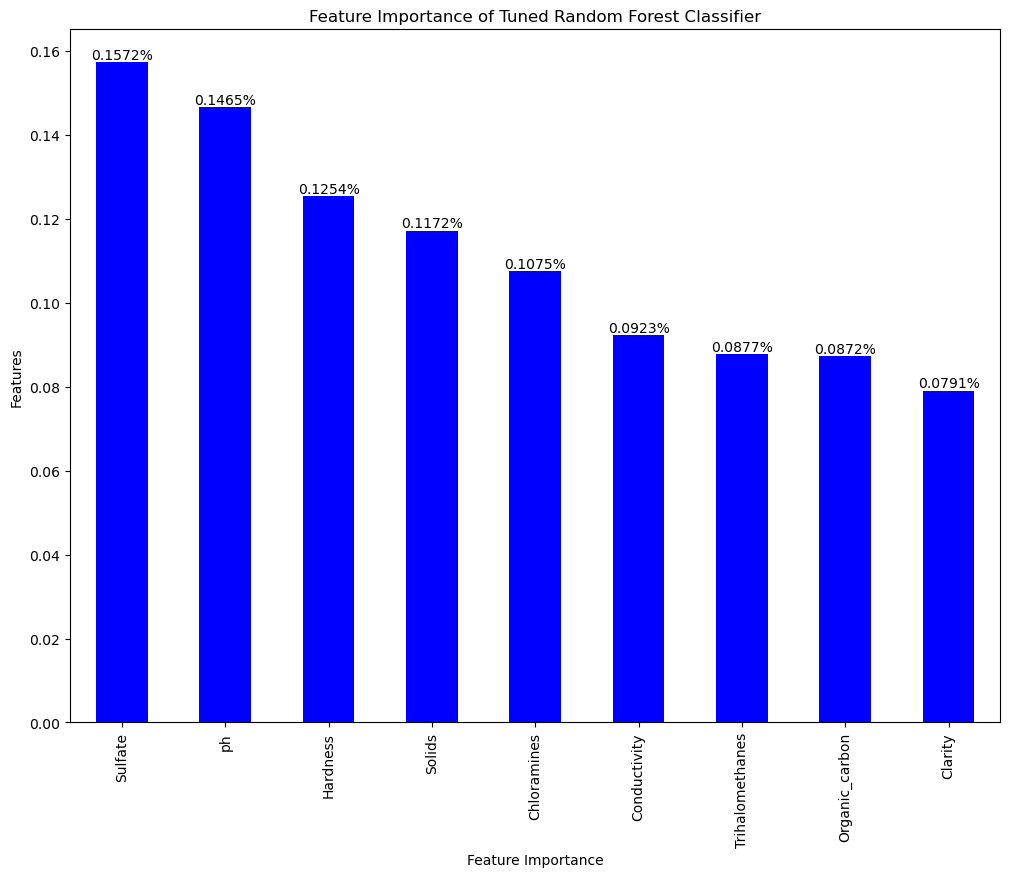

In [27]:
# Convert the NumPy array to a Pandas DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calculate the feature importances
importance = pd.Series(best_rf_model.feature_importances_, index=X_train_scaled_df.columns)
importance=importance.sort_values(ascending=False)
# Create the plot
fig, ax = plt.subplots(figsize=(12, 9))

    
# Plot the feature importances
importance.plot(kind='bar', color="blue", ax=ax)

# Format the plot
ax.set_title("Feature Importance of Tuned Random Forest Classifier")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Features")
ax.bar_label(ax.containers[0], fmt='%.4f%%')

# Show the plot
plt.show()